#  **DATA CLEANING, EDA (Exploratory Data Analysis) and DATA INTEGRATION on Children's medical condition and the role of Vaccination**


#### **Practice opening and inspecting the contents of CSVs using pandas dataframes**#### **Ddescriptive structure of the dat**aes

#### **Practice identify, Summarize and handling missing/invalid/irrelevant data values**

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
columns_to_keep1 = ['disability_type', 'state_name', 'district_name', 'Male_count', 'female_count']
data1 = pd.read_csv('UDIDDATA.csv', usecols=columns_to_keep1)

columns_to_keep2 = ['State/UT', 'Children age 12-23 months fully vaccinated based on information from vaccination card only12 (%)',
    'Children age 12-23 months who have received BCG (%)',
    'Children age 12-23 months who have received 3 doses of polio vaccine13 (%)',
    'Children age 12-23 months who have received 3 doses of penta or DPT vaccine (%)',
    'Children age 12-23 months who have received the first dose of measles-containing vaccine (MCV) (%)',
    'Children age 12-23 months who have received 3 doses of rotavirus vaccine14 (%)',
    'Children age 12-23 months who have received 3 doses of penta or hepatitis B vaccine (%)',
    'Children age 12-23 months who received most of their vaccinations in a public health facility (%)',
    'Children age 12-23 months who received most of their vaccinations in a private health facility (%)']
data2 = pd.read_csv('Districts_Factsheet.csv', usecols=columns_to_keep2)

short_name_mapping1 = {
    'disability_type': 'Disability',
    'state': 'State',
    'Male_count': 'Male Count',
    'female_count': 'Female Count',
    
}
short_name_mapping2 = {
    'State/UTs' : 'State',
    'Children age 12-23 months fully vaccinated based on information from vaccination card only12 (%)': 'Fully_Vax_12-23mon',
    'Children age 12-23 months who have received BCG (%)': 'BCG_Vax_12-23mon',
    'Children age 12-23 months who have received 3 doses of polio vaccine13 (%)': 'Polio_Vax_12-23mon',
    'Children age 12-23 months who have received 3 doses of penta or DPT vaccine (%)': 'Penta/DPT_Vax_12-23mon',
    'Children age 12-23 months who have received the first dose of measles-containing vaccine (MCV) (%)': 'Measles_Vax_12-23mon',
    'Children age 12-23 months who have received 3 doses of rotavirus vaccine14 (%)': 'Rotavirus_Vax_12-23mon',
    'Children age 12-23 months who have received 3 doses of penta or hepatitis B vaccine (%)': 'Penta/HepB_Vax_12-23mon',
    'Children age 12-23 months who received most of their vaccinations in a public health facility (%)': 'Public_Facility_Vax',
    'Children age 12-23 months who received most of their vaccinations in a private health facility (%)': 'Private_Facility_Vax'
}
data1.rename(columns=short_name_mapping1, inplace=True)
data1 = data1[data1['Disability'] != 'Acid Attack Victim']
data1.reset_index(drop=True, inplace=True)
data2.rename(columns=short_name_mapping2, inplace=True)
data1.head()


,state_name,district_name,Disability,Male Count,Female Count
0,Maharashtra,Yavatmal,Autism Spectrum Disorder,2,0
1,Maharashtra,Yavatmal,Autism Spectrum Disorder,0,1
2,Puducherry,Yanam,Autism Spectrum Disorder,1,0
3,Haryana,Yamunanagar,Autism Spectrum Disorder,0,1
4,Haryana,Yamunanagar,Autism Spectrum Disorder,2,1


In [4]:
data2.head()

,State/UT,Fully_Vax_12-23mon,BCG_Vax_12-23mon,Polio_Vax_12-23mon,Penta/DPT_Vax_12-23mon,Measles_Vax_12-23mon,Rotavirus_Vax_12-23mon,Penta/HepB_Vax_12-23mon,Public_Facility_Vax,Private_Facility_Vax
0,Andaman & Nicobar Islands,(94.1),(80.4),(69.1),(71.9),(67.3),(3.1),(68.6),(100.0),(0.0)
1,Andaman & Nicobar Islands,*,*,*,*,*,*,*,*,*
2,Andaman & Nicobar Islands,(96.6),(100.0),(79.0),(94.8),(81.7),(0.0),(85.3),(93.1),(4.3)
3,Andhra Pradesh,(100.0),(93.3),(82.8),(89.7),(93.3),(74.8),(89.7),(97.0),(3.0)
4,Andhra Pradesh,*,(100.0),(76.8),(90.3),(92.5),(77.3),(83.6),(100.0),(0.0)


In [7]:
def extract_numeric_and_convert(val):
    if val == '*':
        return np.nan
    else:
        try:
            return float(val.replace('(', '').replace(')', ''))
        except ValueError:
            return np.nan


# Convert features to float (except 'State/UT')
cols_to_convert = data2.columns.difference(['State/UT'])
data2[cols_to_convert] = data2[cols_to_convert].applymap(extract_numeric_and_convert)

# Display the updated DataFrame
print("Data2 after converting to float and handling missing values:")
print(data2)

Data2 after converting to float and handling missing values:
                      State/UT  Fully_Vax_12-23mon  BCG_Vax_12-23mon  \
0    Andaman & Nicobar Islands                94.1              80.4   
1    Andaman & Nicobar Islands                 NaN               NaN   
2    Andaman & Nicobar Islands                96.6             100.0   
3               Andhra Pradesh               100.0              93.3   
4               Andhra Pradesh                 NaN             100.0   
..                         ...                 ...               ...   
702                West Bengal                96.3             100.0   
703                West Bengal                86.8             100.0   
704                West Bengal                74.3             100.0   
705                West Bengal                69.7              95.9   
706                West Bengal                97.2             100.0   

     Polio_Vax_12-23mon  Penta/DPT_Vax_12-23mon  Measles_Vax_12-23mon  \
0

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12416\2674475182.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data2[cols_to_convert] = data2[cols_to_convert].applymap(extract_numeric_and_convert)


In [25]:
data2.dtypes

State/UT                    object
Fully_Vax_12-23mon         float64
BCG_Vax_12-23mon           float64
Polio_Vax_12-23mon         float64
Penta/DPT_Vax_12-23mon     float64
Measles_Vax_12-23mon       float64
Rotavirus_Vax_12-23mon     float64
Penta/HepB_Vax_12-23mon    float64
Public_Facility_Vax        float64
Private_Facility_Vax       float64
dtype: object

In [8]:
print(data1.shape)
print(data2.shape)

(51832, 5)
(707, 10)


In [9]:
data1.describe()  #without cleaning the data

,Male Count,Female Count
count,51832.000000,51832.000000
mean,116.551011,57.319880
std,481.169630,204.895055
min,0.000000,0.000000
25%,2.000000,1.000000
50%,9.000000,4.000000
75%,49.000000,27.000000
max,16863.000000,6707.000000


In [10]:
data2.describe()  #without cleaning the data

,Fully_Vax_12-23mon,BCG_Vax_12-23mon,Polio_Vax_12-23mon,Penta/DPT_Vax_12-23mon,Measles_Vax_12-23mon,Rotavirus_Vax_12-23mon,Penta/HepB_Vax_12-23mon,Public_Facility_Vax,Private_Facility_Vax
count,685.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,691.000000,691.000000
mean,84.035766,95.018300,81.524640,87.359222,88.472767,39.074640,84.673055,95.703039,3.208104
std,10.018713,4.595147,10.555385,8.458608,8.225596,32.192434,9.931479,4.883798,4.493298
min,45.000000,65.900000,47.600000,53.300000,53.200000,0.000000,39.500000,67.100000,0.000000
25%,77.400000,92.725000,74.425000,82.500000,83.800000,5.200000,79.025000,93.500000,0.000000
50%,85.000000,96.050000,82.200000,88.850000,89.600000,39.600000,86.350000,97.300000,1.600000
75%,92.200000,98.200000,89.975000,93.700000,94.975000,69.475000,91.900000,100.000000,4.700000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,32.900000


In [11]:
data1.duplicated()
data1[data1.duplicated()==True]

,state_name,district_name,Disability,Male Count,Female Count
6,Haryana,Yamunanagar,Autism Spectrum Disorder,2,1
7,Haryana,Yamunanagar,Autism Spectrum Disorder,0,1
9,Karnataka,Yadgir,Autism Spectrum Disorder,1,0
35,Maharashtra,Wardha,Autism Spectrum Disorder,1,2
47,Tamil Nadu,Villupuram,Autism Spectrum Disorder,2,1
...,...,...,...,...,...
51749,Uttar Pradesh,Auraiya,Thalassemia,2,0
51786,Uttar Pradesh,Amethi,Thalassemia,1,1
51791,Uttar Pradesh,Ambedkar Nagar,Thalassemia,2,0
51803,Uttarakhand,Almora,Thalassemia,1,1


In [12]:
data1.drop_duplicates(inplace = True)

In [15]:
data1.shape

(50252, 5)

In [16]:
data2.duplicated()
data2[data2.duplicated()==True]

,State/UT,Fully_Vax_12-23mon,BCG_Vax_12-23mon,Polio_Vax_12-23mon,Penta/DPT_Vax_12-23mon,Measles_Vax_12-23mon,Rotavirus_Vax_12-23mon,Penta/HepB_Vax_12-23mon,Public_Facility_Vax,Private_Facility_Vax
290,Kerala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,Kerala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,Madhya Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,Madhya Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,Maharastra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data2.drop_duplicates(inplace=True)

In [19]:
data2.shape

(702, 10)

In [21]:
data1.isna().sum()

state_name       0
district_name    0
Disability       0
Male Count       0
Female Count     0
dtype: int64

In [24]:
data2.dtypes

State/UT                    object
Fully_Vax_12-23mon         float64
BCG_Vax_12-23mon           float64
Polio_Vax_12-23mon         float64
Penta/DPT_Vax_12-23mon     float64
Measles_Vax_12-23mon       float64
Rotavirus_Vax_12-23mon     float64
Penta/HepB_Vax_12-23mon    float64
Public_Facility_Vax        float64
Private_Facility_Vax       float64
dtype: object

In [27]:
data1.isna().sum()/len(data1)

state_name       0.0
district_name    0.0
Disability       0.0
Male Count       0.0
Female Count     0.0
dtype: float64

In [28]:
data2.isna().sum()/len(data2)

State/UT                   0.000000
Fully_Vax_12-23mon         0.024217
BCG_Vax_12-23mon           0.011396
Polio_Vax_12-23mon         0.011396
Penta/DPT_Vax_12-23mon     0.011396
Measles_Vax_12-23mon       0.011396
Rotavirus_Vax_12-23mon     0.011396
Penta/HepB_Vax_12-23mon    0.011396
Public_Facility_Vax        0.015670
Private_Facility_Vax       0.015670
dtype: float64

In [29]:
data2.mode()

,State/UT,Fully_Vax_12-23mon,BCG_Vax_12-23mon,Polio_Vax_12-23mon,Penta/DPT_Vax_12-23mon,Measles_Vax_12-23mon,Rotavirus_Vax_12-23mon,Penta/HepB_Vax_12-23mon,Public_Facility_Vax,Private_Facility_Vax
0,Uttar Pradesh,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,0.0


In [30]:
data2.fillna(data2.mode().iloc[0], inplace=True)

In [31]:
data2.isna().sum()

State/UT                   0
Fully_Vax_12-23mon         0
BCG_Vax_12-23mon           0
Polio_Vax_12-23mon         0
Penta/DPT_Vax_12-23mon     0
Measles_Vax_12-23mon       0
Rotavirus_Vax_12-23mon     0
Penta/HepB_Vax_12-23mon    0
Public_Facility_Vax        0
Private_Facility_Vax       0
dtype: int64

## *Identify Outliers and smoothning*

## **o Box plot**

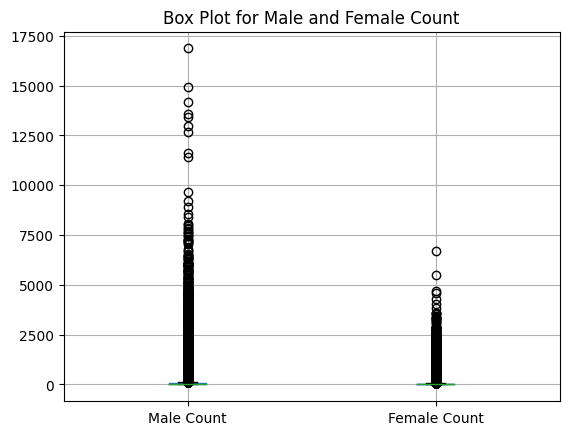

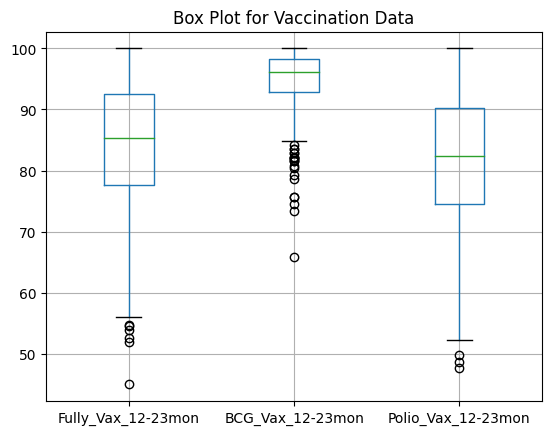

In [33]:
# Box plot for Male Count and Female Count in data1
data1[['Male Count', 'Female Count']].boxplot()
plt.title('Box Plot for Male and Female Count')
plt.show()

# Box plot for selected columns in data2
data2[['Fully_Vax_12-23mon', 'BCG_Vax_12-23mon', 'Polio_Vax_12-23mon']].boxplot()
plt.title('Box Plot for Vaccination Data')
plt.show()

## **o Violin plot**

D:\jupy\venvss\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jupy\venvss\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jupy\venvss\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


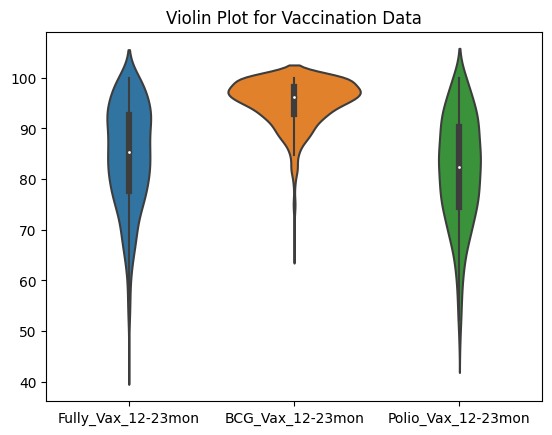

In [34]:
# Violin plot for selected columns in data2
sns.violinplot(data=data2[['Fully_Vax_12-23mon', 'BCG_Vax_12-23mon', 'Polio_Vax_12-23mon']])
plt.title('Violin Plot for Vaccination Data')
plt.show()

### **Change text case and date formatting**
### **Practice cleaning text data by removing whitespace and fixing typos**

In [35]:
# Changing text case for a specific column in data1
data1['state_name'] = data1['state_name'].str.title()

# Changing text case for a specific column in data2
data2['State/UT'] = data2['State/UT'].str.upper()

In [36]:
data1.head()

,state_name,district_name,Disability,Male Count,Female Count
0,Maharashtra,Yavatmal,Autism Spectrum Disorder,2,0
1,Maharashtra,Yavatmal,Autism Spectrum Disorder,0,1
2,Puducherry,Yanam,Autism Spectrum Disorder,1,0
3,Haryana,Yamunanagar,Autism Spectrum Disorder,0,1
4,Haryana,Yamunanagar,Autism Spectrum Disorder,2,1


In [37]:
data2.head()

,State/UT,Fully_Vax_12-23mon,BCG_Vax_12-23mon,Polio_Vax_12-23mon,Penta/DPT_Vax_12-23mon,Measles_Vax_12-23mon,Rotavirus_Vax_12-23mon,Penta/HepB_Vax_12-23mon,Public_Facility_Vax,Private_Facility_Vax
0,ANDAMAN & NICOBAR ISLANDS,94.1,80.4,69.1,71.9,67.3,3.1,68.6,100.0,0.0
1,ANDAMAN & NICOBAR ISLANDS,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,0.0
2,ANDAMAN & NICOBAR ISLANDS,96.6,100.0,79.0,94.8,81.7,0.0,85.3,93.1,4.3
3,ANDHRA PRADESH,100.0,93.3,82.8,89.7,93.3,74.8,89.7,97.0,3.0
4,ANDHRA PRADESH,100.0,100.0,76.8,90.3,92.5,77.3,83.6,100.0,0.0


## **Study the relationship between the features of the dataset Statistics based**
## **o Heatmap**
## **o Line graph**

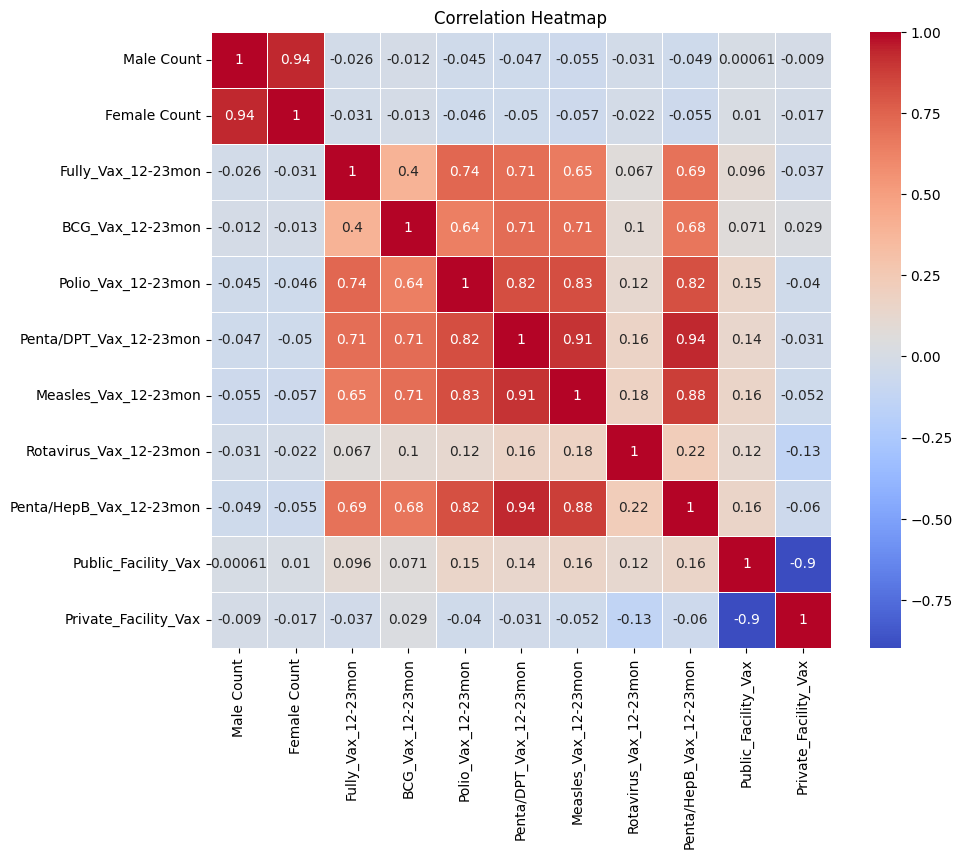

In [38]:
# Assuming data1 and data2 are DataFrames with numerical columns
# Concatenate the numerical columns from both datasets
combined_data = pd.concat([data1.select_dtypes(include=np.number), data2.select_dtypes(include=np.number)], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<Figure size 1200x600 with 0 Axes>

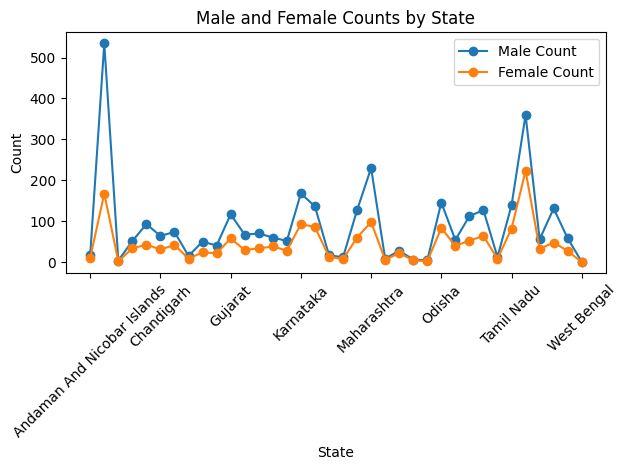

In [39]:
# Group the data by 'state_name' and calculate the mean for 'Male Count' and 'Female Count'
line_data = data1.groupby('state_name')[['Male Count', 'Female Count']].mean()

# Create a line graph
plt.figure(figsize=(12, 6))
line_data.plot(kind='line', marker='o')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Male and Female Counts by State')
plt.xticks(rotation=45)
plt.legend(['Male Count', 'Female Count'])
plt.tight_layout()
plt.show()

## **Practice the correlation/collinearity/causality analysis** map

## **o Scatter Diagram**
## **o Bubble chart**
## **o Correlation map**

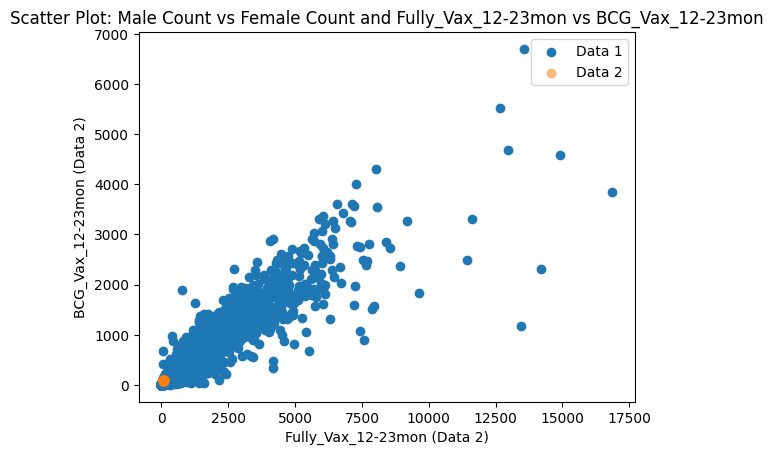

In [54]:
# Scatter plot for data1
plt.scatter(data1['Male Count'], data1['Female Count'], label='Data 1')
plt.xlabel('Male Count (Data 1)')
plt.ylabel('Female Count (Data 1)')

# Scatter plot for data2
plt.scatter(data2['Fully_Vax_12-23mon'], data2['BCG_Vax_12-23mon'], label='Data 2', alpha=0.5)
plt.xlabel('Fully_Vax_12-23mon (Data 2)')
plt.ylabel('BCG_Vax_12-23mon (Data 2)')

plt.title('Scatter Plot: Male Count vs Female Count and Fully_Vax_12-23mon vs BCG_Vax_12-23mon')
plt.legend()
plt.show()


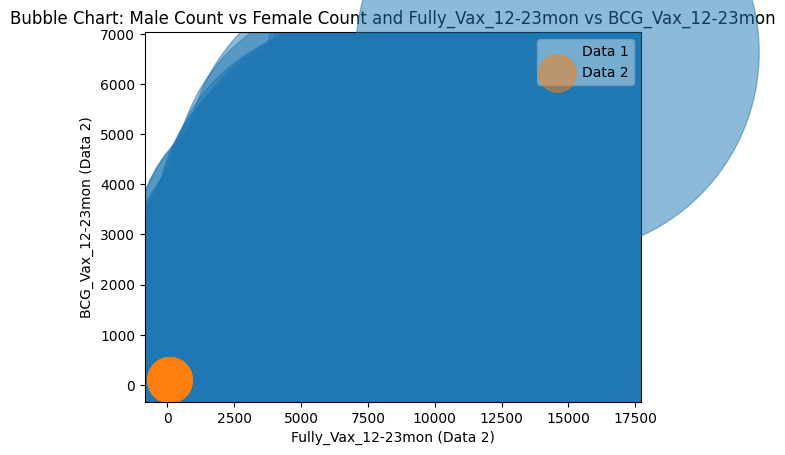

In [55]:
# Bubble chart for data1
plt.scatter(data1['Male Count'], data1['Female Count'], s=data1['Male Count']*10, alpha=0.5, label='Data 1')
plt.xlabel('Male Count (Data 1)')
plt.ylabel('Female Count (Data 1)')

# Bubble chart for data2
plt.scatter(data2['Fully_Vax_12-23mon'], data2['BCG_Vax_12-23mon'], s=data2['Fully_Vax_12-23mon']*10, alpha=0.5, label='Data 2')
plt.xlabel('Fully_Vax_12-23mon (Data 2)')
plt.ylabel('BCG_Vax_12-23mon (Data 2)')

plt.title('Bubble Chart: Male Count vs Female Count and Fully_Vax_12-23mon vs BCG_Vax_12-23mon')
plt.legend()
plt.show()


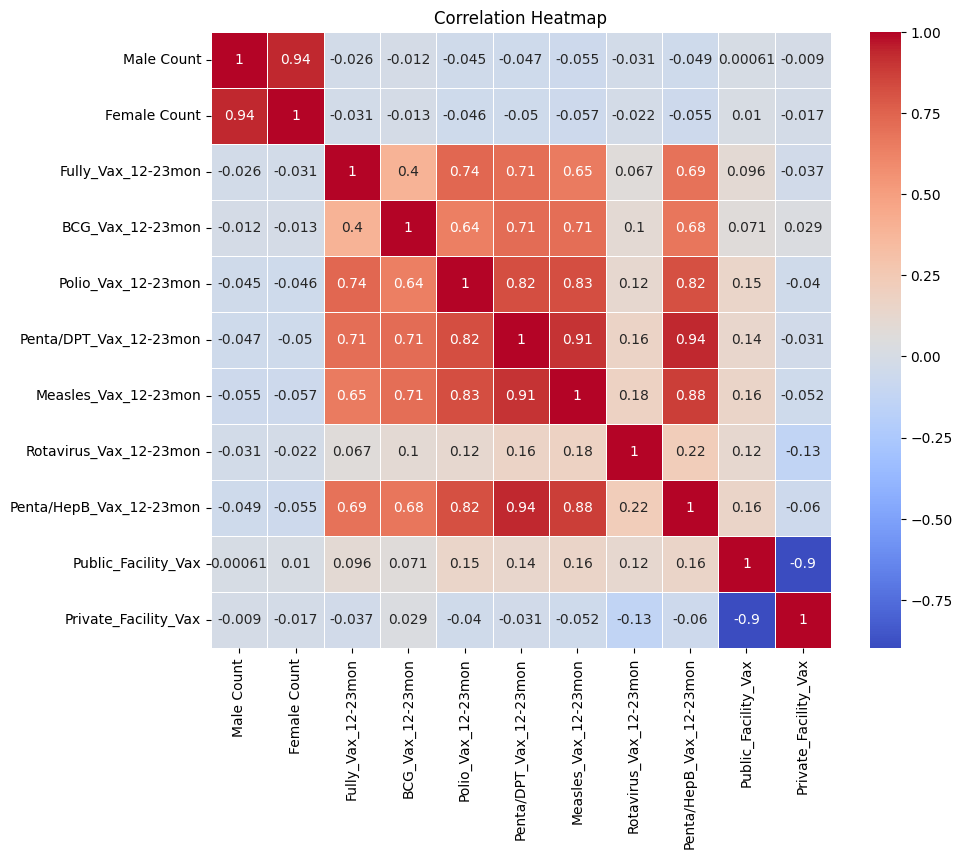

In [56]:
# Assuming 'combined_data' is a combined DataFrame with numerical columns
# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## **Pie chart, Histogram, Bar chart, word cloud wherever suitable**

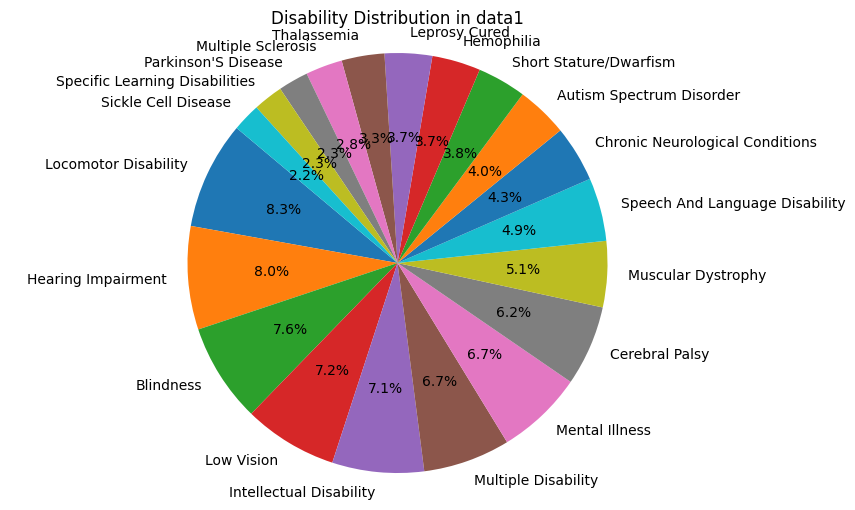

In [46]:
# Pie chart for 'Disability' distribution in data1
disability_counts = data1['Disability'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(disability_counts, labels=disability_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Disability Distribution in data1')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


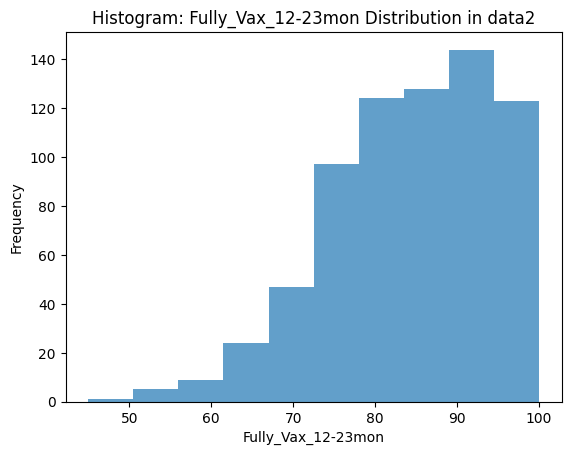

In [47]:
# Histogram for 'Fully_Vax_12-23mon' in data2
plt.hist(data2['Fully_Vax_12-23mon'], bins=10, alpha=0.7)
plt.xlabel('Fully_Vax_12-23mon')
plt.ylabel('Frequency')
plt.title('Histogram: Fully_Vax_12-23mon Distribution in data2')
plt.show()


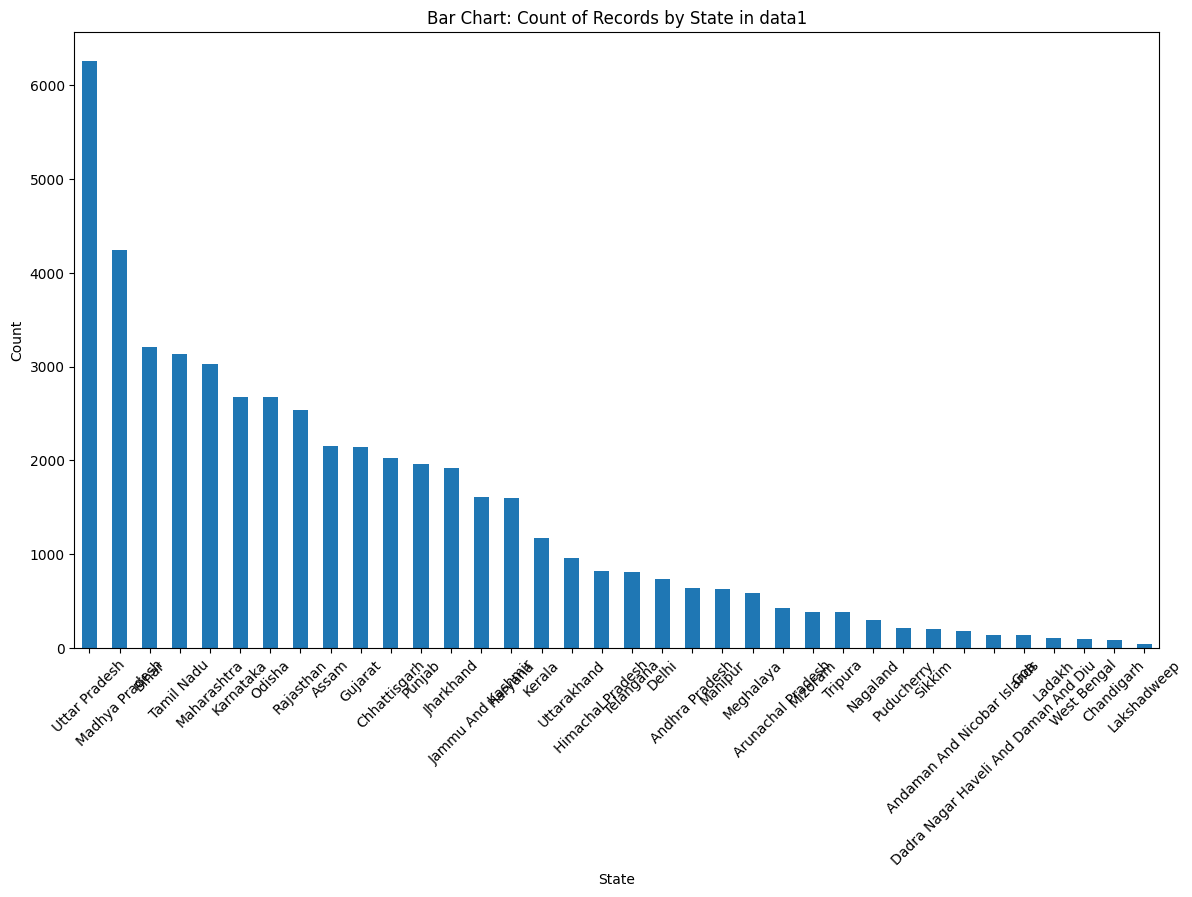

In [48]:
# Bar chart for 'state_name' and total count in data1
state_counts = data1['state_name'].value_counts()
plt.figure(figsize=(14, 8))
state_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Bar Chart: Count of Records by State in data1')
plt.xticks(rotation=45)
plt.show()


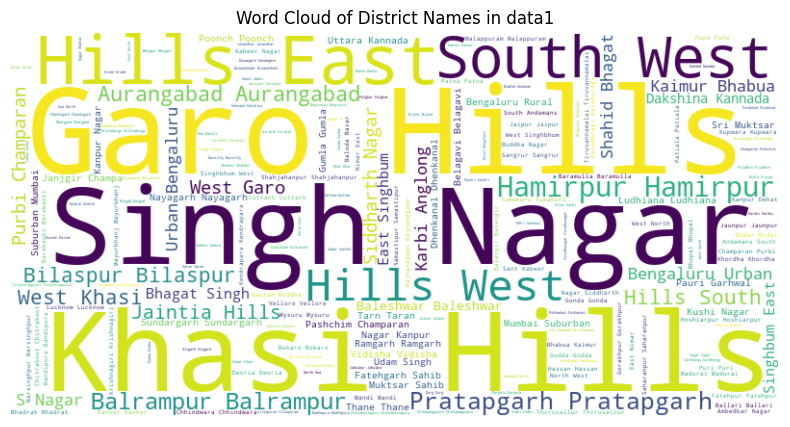

In [50]:
from wordcloud import WordCloud

# Combine all 'district_name' entries into a single string
text = ' '.join(data1['district_name'].dropna().values)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of District Names in data1')
plt.show()


## **OBSERVATION AND INSIGHTS**

Vaccination Rates:
Vaccination rates vary significantly for different types of vaccines in data2, indicating potential disparities in vaccination coverage.

Gender Counts:
The scatter plot and bubble chart for data1 demonstrate that the 'Male Count' and 'Female Count' are not strongly correlated. It suggests that gender distribution across districts for autism cases may not follow a simple linear relationship.

Geographical Distribution:
The bar chart by state in data1 indicates varying numbers of autism cases across different states, highlighting the need for region-specific interventions and resources.

Disability Distribution:
The pie chart in data1 indicates that Autism Spectrum Disorder is the most prevalent disability in the dataset, underscoring the importance of understanding and addressing autism-related challenges.

Vaccination Distribution:
The histogram in data2 shows a wide range of 'Fully_Vax_12-23mon' rates, suggesting the need for targeted vaccination efforts to ensure adequate coverage across regions.